In [124]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv('Family Income and Expenditure.csv')
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [126]:
# Education Level vs Household Income
educ = df.groupby('Household Head Highest Grade Completed').agg(
    {
        'Household Head Highest Grade Completed': 'count',
        'Total Household Income': ['median', 'mean']
    }
)
educ.columns = ['_'.join(x) for x in educ.columns.to_flat_index()]
educ = educ.reset_index()
display(educ.sort_values('Total Household Income_mean', ascending=False).head(5))
display(educ.sort_values('Total Household Income_mean', ascending=False).tail(5))

,Household Head Highest Grade Completed,Household Head Highest Grade Completed_count,Total Household Income_median,Total Household Income_mean
24,Law Programs,39,984100.0,1.223659e+06
33,Post Baccalaureate,247,775080.0,9.093783e+05
30,Other Programs of Education at the Third Level...,9,581221.0,8.071539e+05
23,Journalism and Information Programs,31,615502.0,7.311087e+05
1,Architecture and Building Programs,33,582614.0,6.794306e+05


,Household Head Highest Grade Completed,Household Head Highest Grade Completed_count,Total Household Income_median,Total Household Income_mean
16,Grade 3,1994,114215.5,146686.321966
15,Grade 2,1311,108313.0,135910.622426
14,Grade 1,874,103541.0,130052.496568
34,Preschool,15,104364.0,125430.800000
28,No Grade Completed,1228,94305.0,109237.486156


In [127]:
# Source of Income vs Expenditure
income = df.groupby('Main Source of Income').agg(
    {
        'Main Source of Income': 'count',
        'Total Food Expenditure': 'mean',
        'Housing and water Expenditure': 'mean',
        'Total Household Income': 'mean'
    }
)
income

,Main Source of Income,Total Food Expenditure,Housing and water Expenditure,Total Household Income
Main Source of Income,,,,
Enterpreneurial Activities,10320,76778.63876,29822.020930,213484.383721
Other sources of Income,10836,75444.12034,46023.540421,242638.827243
Wage/Salaries,20388,94442.38709,38640.185109,267414.952080


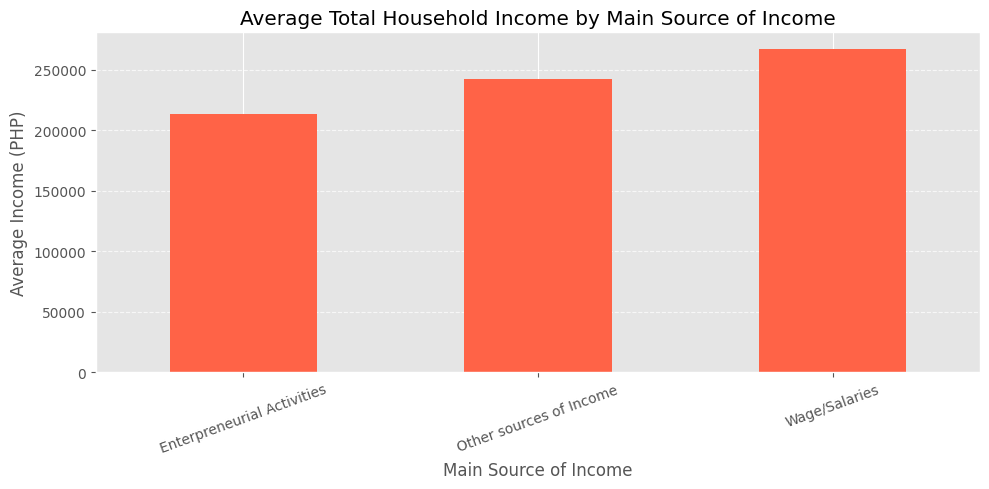

In [128]:
incomeSource = df.groupby("Main Source of Income")["Total Household Income"].mean().sort_values()

plt.figure(figsize=(10, 5))
incomeSource.plot(kind="bar", color="tomato")

plt.title("Average Total Household Income by Main Source of Income")
plt.xlabel("Main Source of Income")
plt.ylabel("Average Income (PHP)")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

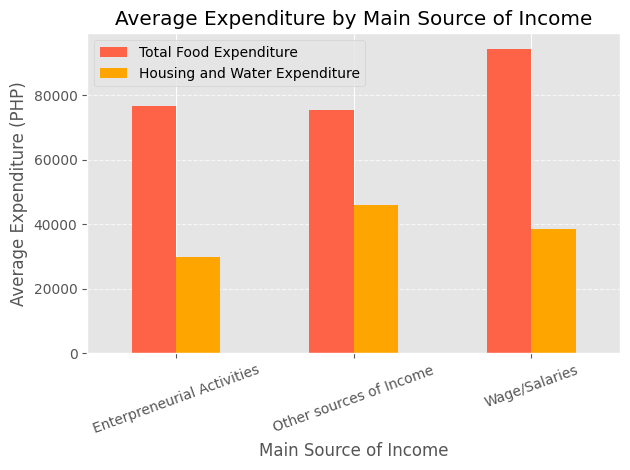

In [129]:
food = df.groupby("Main Source of Income")["Total Food Expenditure"].mean().sort_values()
house = df.groupby("Main Source of Income")["Housing and water Expenditure"].mean().sort_values()

expenditures = pd.DataFrame({
    'Total Food Expenditure': food,
    'Housing and Water Expenditure': house
})

plt.figure(figsize=(10, 5))
expenditures.plot(kind="bar", color=['tomato', 'orange'])

plt.title("Average Expenditure by Main Source of Income")
plt.xlabel("Main Source of Income")
plt.ylabel("Average Expenditure (PHP)")
plt.legend(["Total Food Expenditure", "Housing and Water Expenditure"])
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [130]:
# Worker Class vs Expenditure
workerClass = df.groupby('Household Head Class of Worker').agg(
    {
        'Household Head Class of Worker': 'count',
        'Total Food Expenditure': 'mean',
        'Housing and water Expenditure': 'mean',
        'Total Household Income': 'mean'
    }
)
workerClass.sort_values('Total Household Income')

,Household Head Class of Worker,Total Food Expenditure,Housing and water Expenditure,Total Household Income
Household Head Class of Worker,,,,
Worked for private household,811,76964.151665,34657.013564,189454.711467
Self-employed wihout any employee,13766,75767.915516,29810.475229,198160.255702
Worked for private establishment,13731,85657.948001,33921.002840,220260.745321
Worked without pay in own family-operated farm or business,285,94511.614035,47953.031579,311922.526316
Employer in own family-operated farm or business,2581,94251.057342,47588.859357,359488.916699
Worked for government/government corporation,2820,111744.539007,56645.738298,426543.854255
Worked with pay in own family-operated farm or business,14,108120.357143,60693.428571,447975.428571


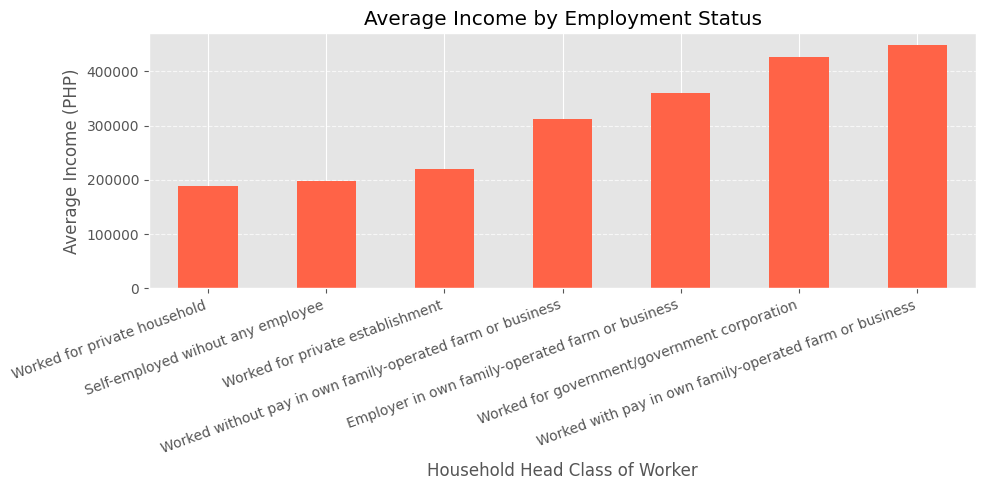

In [131]:
incomeSource = df.groupby("Household Head Class of Worker")["Total Household Income"].mean().sort_values()

plt.figure(figsize=(10, 5))
incomeSource.plot(kind="bar", color="tomato")

plt.title("Average Income by Employment Status")
plt.xlabel("Household Head Class of Worker")
plt.ylabel("Average Income (PHP)")

plt.xticks(rotation=20, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

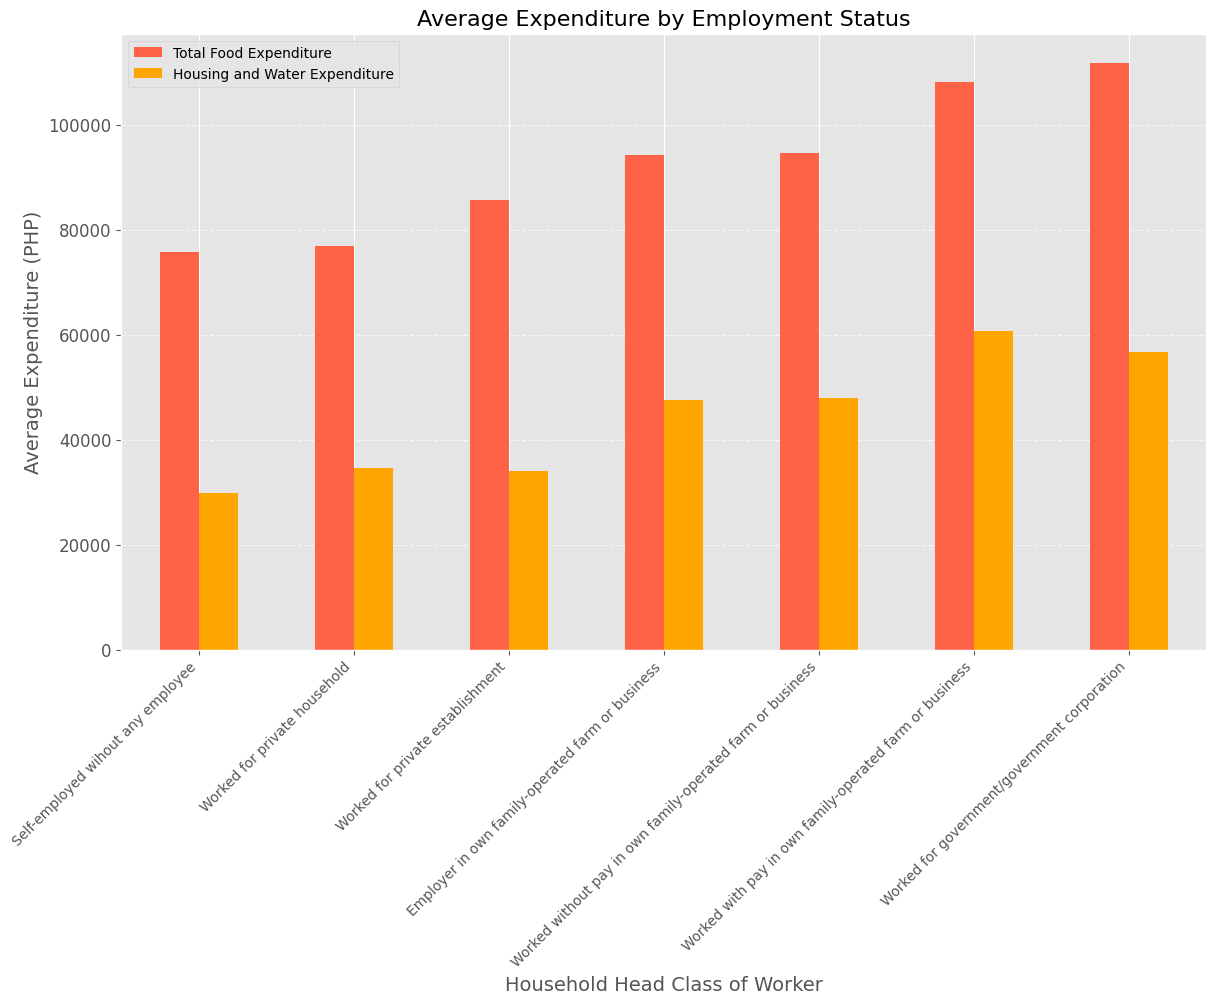

In [138]:
food = df.groupby("Household Head Class of Worker")["Total Food Expenditure"].mean().sort_values()
house = df.groupby("Household Head Class of Worker")["Housing and water Expenditure"].mean().sort_values()

expenditures = pd.DataFrame({
    'Total Food Expenditure': food,
    'Housing and Water Expenditure': house
})

expenditures = expenditures.sort_values(by='Total Food Expenditure', ascending=True)

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(14, 8))

expenditures.plot(kind="bar", color=['tomato', 'orange'], ax=ax)

ax.set_title("Average Expenditure by Employment Status", fontsize=16)
ax.set_xlabel("Household Head Class of Worker", fontsize=14)
ax.set_ylabel("Average Expenditure (PHP)", fontsize=14)

ax.tick_params(axis='x', labelsize=10)
plt.xticks(rotation=45, ha='right')
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [133]:
# Household Composition vs Income and Expenditure
def classify_composition(marital_status, household_type):
  if marital_status == 'Married':
    if household_type == 'Single Family':
      return 'Dual Parent, Single Family'
    else:
      return 'Dual Parent, Extended Family'
  else:
    if household_type == 'Single Family':
      return 'Single Parent, Single Family'
    else:
      return 'Single Parent, Extended Family'

df['Household Composition'] = df.apply(lambda x: classify_composition(x['Household Head Marital Status'], x['Type of Household']), axis=1)
df[['Total Household Income', 'Household Composition']].head()

,Total Household Income,Household Composition
0,480332,"Single Parent, Extended Family"
1,198235,"Dual Parent, Single Family"
2,82785,"Dual Parent, Single Family"
3,107589,"Dual Parent, Single Family"
4,189322,"Dual Parent, Single Family"


In [134]:
# Mean Expenditure and Household Income per Family Composition
famComp = df.groupby('Household Composition').agg(
    {
        'Household Composition': 'count',
        'Total Food Expenditure': 'mean',
        'Housing and water Expenditure': 'mean',
        'Total Household Income': 'mean'
    }
)
famComp.sort_values('Total Household Income')

,Household Composition,Total Food Expenditure,Housing and water Expenditure,Total Household Income
Household Composition,,,,
"Single Parent, Single Family",5921,57337.185104,34968.906941,183550.524574
"Dual Parent, Single Family",22524,81811.408764,34831.051412,228607.405967
"Single Parent, Extended Family",4276,93768.465154,46253.341908,279743.496492
"Dual Parent, Extended Family",8823,107921.549020,45892.059844,323281.214553


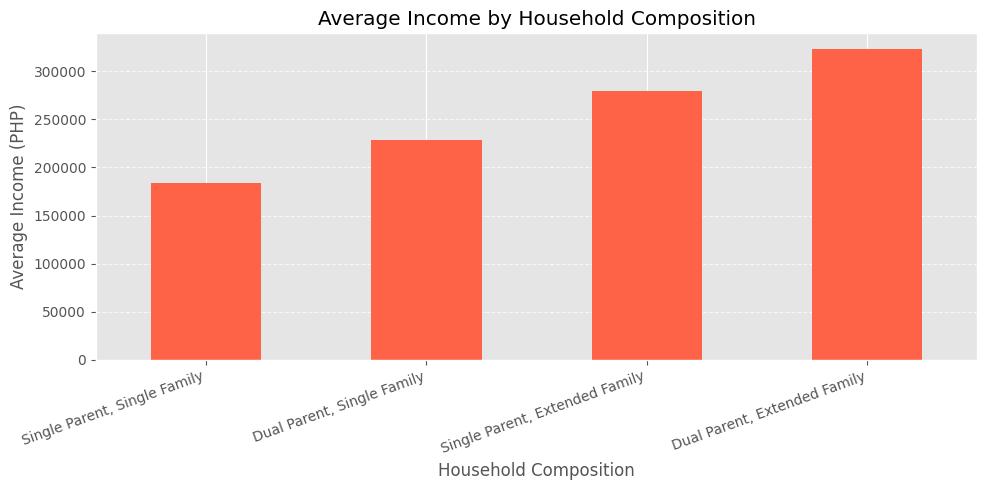

In [135]:
incomeSource = df.groupby("Household Composition")["Total Household Income"].mean().sort_values()

plt.figure(figsize=(10, 5))
incomeSource.plot(kind="bar", color="tomato")

plt.title("Average Income by Household Composition")
plt.xlabel("Household Composition")
plt.ylabel("Average Income (PHP)")

plt.xticks(rotation=20, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

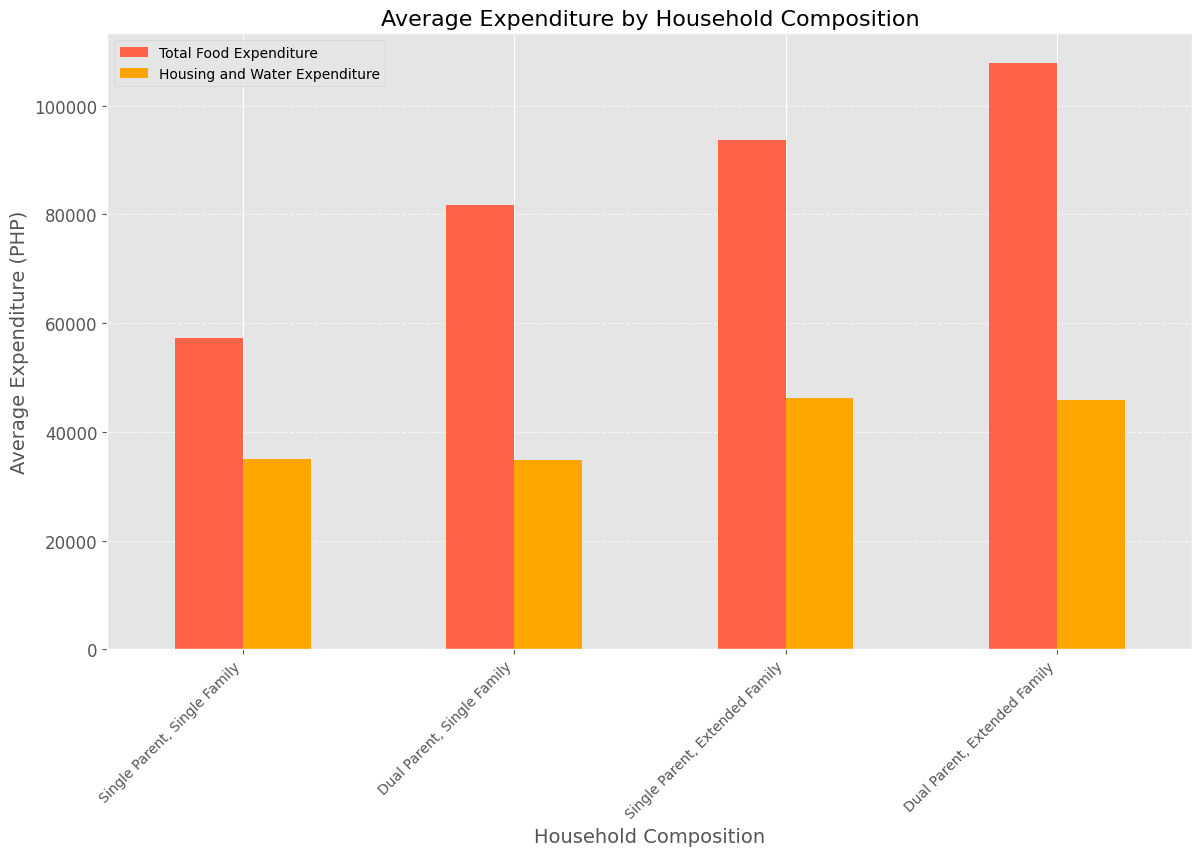

In [137]:
food = df.groupby("Household Composition")["Total Food Expenditure"].mean().sort_values()
house = df.groupby("Household Composition")["Housing and water Expenditure"].mean().sort_values()

expenditures = pd.DataFrame({
    'Total Food Expenditure': food,
    'Housing and Water Expenditure': house
})

expenditures = expenditures.sort_values(by='Total Food Expenditure', ascending=True)

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(14, 8))

expenditures.plot(kind="bar", color=['tomato', 'orange'], ax=ax)

ax.set_title("Average Expenditure by Household Composition", fontsize=16)
ax.set_xlabel("Household Composition", fontsize=14)
ax.set_ylabel("Average Expenditure (PHP)", fontsize=14)

ax.tick_params(axis='x', labelsize=10)
plt.xticks(rotation=45, ha='right')
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
